# Tips for choosing profile locations

To help you pick the locations of your profiles, here are a few resources.

## EPSG:3031 Polar Stereographic map
Read x/y coordinates off this map to choose approximate start/end profile points.

C:\Users\matthewt\AppData\Local\miniforge3\envs\antarctic_plots_dev\lib\site-packages\xarray\backends\cfgrib_.py:29: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(
coast [WARNING]: For a UTM or TM projection, your region -2700000/2700000/-2700000/2700000 is too large to be in degrees and thus assumed to be in meters
coast [WARNING]: For a UTM or TM projection, your region -2700000/2700000/-2700000/2700000 is too large to be in degrees and thus assumed to be in meters


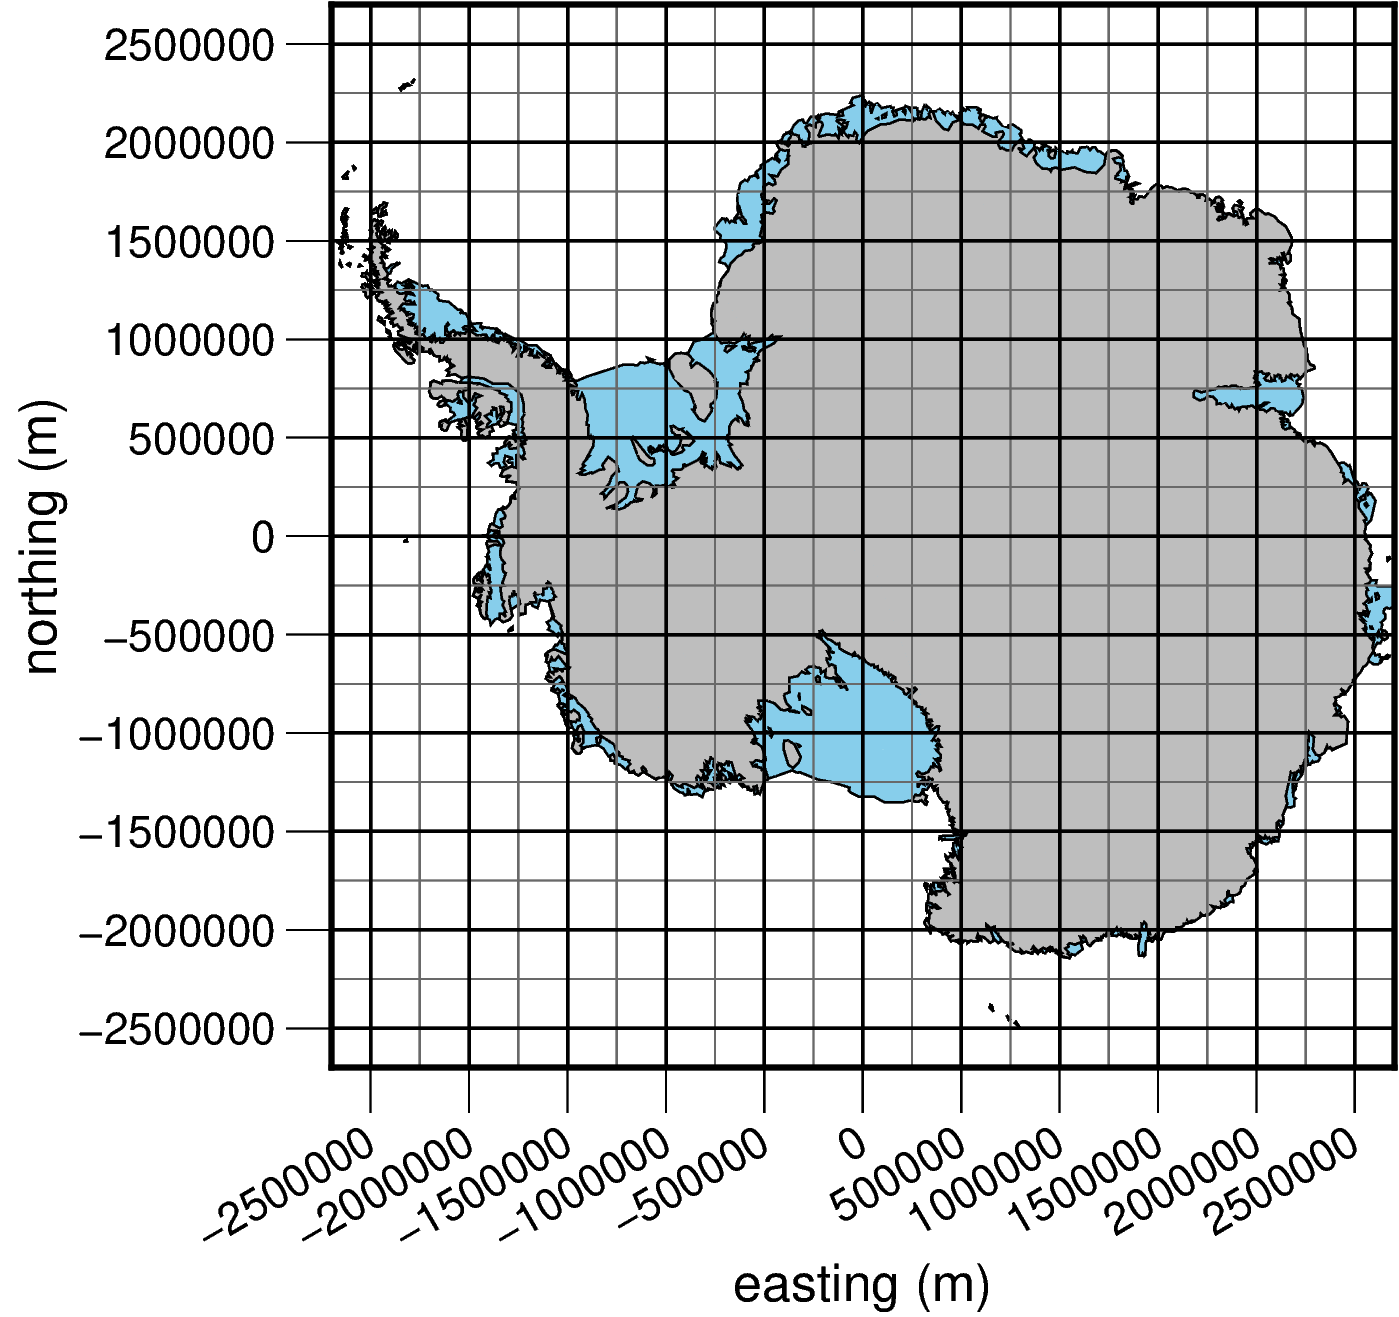

In [1]:
import pygmt

fig = pygmt.Figure()
region = (-2700000, 2700000, -2700000, 2700000)
e, w, n, s = region
fig_height = 90  # in mm
fig_width = fig_height * (w - e) / (s - n)
fig_ratio = (s - n) / (fig_height / 1000)
fig_proj = "x1:" + str(fig_ratio)
fig_proj_ll = "s0/-90/-71/1:" + str(fig_ratio)

fig.coast(
    region=region, projection=fig_proj_ll, shorelines="0.5p,black", land="skyblue"
)
fig.coast(
    projection=fig_proj_ll, area_thresh="+ag", shorelines="0.5p,black", land="gray"
)

with pygmt.config(
    MAP_GRID_PEN_PRIMARY=".4p,dimgray", MAP_GRID_PEN_SECONDARY=".75p,black"
):
    fig.basemap(
        projection=fig_proj,
        frame=[
            "sxa500000g500000+a30+leasting (m)",
            "pxg250000",
            "sya500000g500000+lnorthing (m)",
            "pyg250000",
        ],
    )
fig.show()

Or if you install `ipyleaflet` with `mamba install ipyleaflet`, the below code wil show and interactive map and clicking will give coordinates in EPSG 3031. See the tutorial `profile walkthrough` for an example of extracting a profile from the interactive map, or tutorial `regions_walkthrough` for an example of defining a region from the interactive map.

In [1]:
from antarctic_plots import maps

m = maps.interactive_map()

c:\Users\matthewt\AppData\Local\miniforge3\envs\antarctic_plots_test\lib\site-packages\xarray\backends\cfgrib_.py:29: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


Label(value='')

Map(center=[-90.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out…

## Make custom shapefile in QGIS

QGIS, especially with the [Quantarctica package](https://www.npolar.no/quantarctica/#toggle-id-2), is an easy way to make a custom shapefile. This can then be used with `antarctic_plots` to sample data along the file.

To make the shapefile in QGIS:
*  Layer -> Create Layer -> New Shapefile Layer
* For `Geometry Type`, select `Polygon`
* Select `EPSG:3031` for the coordinate reference system
* Save to the same directory as your python file you want to work with.